In [1]:
#import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load in wage data
minimum_wage_data = "Resources/Minimum Wage Data.csv"
#encoding error resolution
minimum_wage_df = pd.read_csv(minimum_wage_data, encoding="ISO-8859-1")
#changing state name for coherence
minimum_wage_df.loc[(minimum_wage_df['State'] == 'District of Columbia'), 'State'] = 'DC'

minimmum_wage_by_state = minimum_wage_df.groupby(["State", "Year"])

In [3]:
# import cleaned unemployment data
unemployment_data = "Resources/clean_unemployment_data.csv"
unemployment_df = pd.read_csv(unemployment_data)
unemployment_df.loc[(unemployment_df['State'] == 'D.C.'), 'State'] = 'DC'

In [4]:
# filtered minimum wage data for years between 2009-2017
mw = minimum_wage_df.drop(["Table_Data", "Footnote"], 1)
cmw = mw[mw["Year"]>2008]

cmw.head()

,Year,State,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
2255,2009,Alabama,7.25,7.25,214.537,8.46,8.46
2256,2009,Alaska,7.15,7.15,214.537,8.35,8.35
2257,2009,Arizona,7.25,7.25,214.537,8.46,8.46
2258,2009,Arkansas,6.25,6.25,214.537,7.29,7.29
2259,2009,California,8.00,8.00,214.537,9.34,9.34


## Viewing data in plots to get a better sense

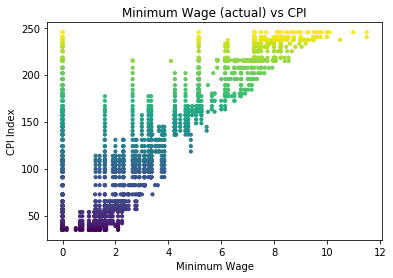

<Figure size 432x288 with 0 Axes>

In [5]:
# created new dataframe to drop rows where minimum wage value is 0
mini_data = mw.replace({"High.2018":0},None)
mini_data1 = mini_data.dropna()

# goruping by state and year
# mini_data2 = mini_data1.groupby(["State" , "Year"])
# mini_data2.head()

plt.title("Minimum Wage (actual) vs CPI")
plt.xlabel("Minimum Wage")
plt.ylabel("CPI Index")

c = mini_data1["Year"]
plt.scatter(mini_data1["High.Value"], mini_data1["CPI.Average"], c=c, s=10)
plt.show()
plt.savefig("plots/Actual Min wage with CPI.png")

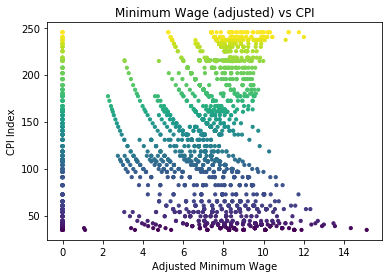

In [6]:
plt.xlabel("Adjusted Minimum Wage")
plt.ylabel("CPI Index")
plt.title("Minimum Wage (adjusted) vs CPI")
c = mini_data1["Year"]
plt.scatter(mini_data1["High.2018"], mini_data1["CPI.Average"], c=c, s=10)
plt.savefig("plots/Adjusted minimum wage vs CPI.png")

In [7]:
# Merging data frames
Uemp_min_wage = pd.merge(unemployment_df, cmw, how="left", on=["Year", "State"])
#type(Uemp_min_wage["Year"][0])
# Uemp_min_wage


In [8]:
# read in the crime data
crime_data = "Resources/crimetotal.csv"

crime_df = pd.read_csv(crime_data)
crime_df1 = crime_df.dropna()
crime_df1["Year"]=crime_df1['Year'].astype(int)
crime_df1

#state name coherence
crime_df1.loc[(crime_df1['State'] == 'D.C.'), 'State'] = 'DC'

#merging all data 
cleaned = pd.merge(Uemp_min_wage, crime_df1, how="left", left_on=["Year","State"], right_on=["Year", "State"])


C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\willi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
# cleaning final dataframe
data = cleaned.drop(["Unnamed: 0"], axis=1)
#exporting the csv for final version
data.to_csv("Resources/data.csv")

In [22]:
# data

Text(0, 0.5, 'Total Crime')

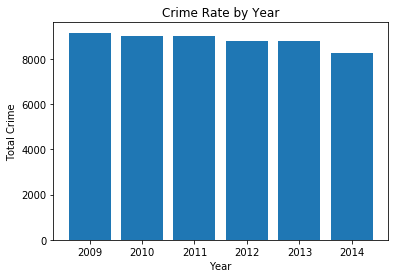

In [23]:
# plot a bar chart of year and crime index

plt.bar(data["Year"], data["Total Crime Rate"],)
plt.title("Crime Rate by Year")
plt.xlabel("Year")
plt.ylabel("Total Crime")



Text(0, 0.5, 'Unemployment Index')

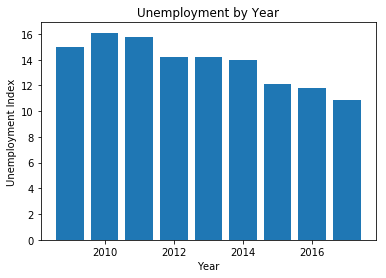

In [30]:
# plot bar of year vs unemployment 

plt.bar(data["Year"], data["Avg UI"])
plt.title("Unemployment by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Index")

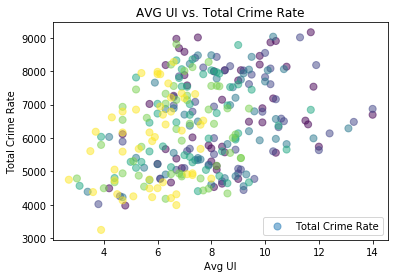

In [35]:
axis = data[data["Year"]<2015]
axis1 = axis.dropna()
axis1
x_axis = axis1["Avg UI"]

lgd = axis1["Year"]
cdict = {2009:"red", 2010: "blue", 2011:"green", 2012:"teal", 2013:"purple", 2014:"yellow"}

crime_rate = axis1["Total Crime Rate"]
plt.title("AVG UI vs. Total Crime Rate")
plt.xlabel("Avg UI")
plt.ylabel("Total Crime Rate")

# # 
# fig, ax = plt.subplots()
c=axis1["Year"]
colors = [2009, 2010, 2011, 2012, 2013, 2014]

# for y in np.unique(lgd):
#     ix = np.where(lgd == y)
#     ax.scatter(x_axis[ix], crime_rate[ix], c = cdict[y], label = y, s = 100)
# ax.legend()
# plt.show()


plt.scatter(x_axis, crime_rate, s=50, c=c, alpha=0.5)
plt.legend()
plt.savefig("plots/Unemployment and Crime index1.png")
